In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [88]:
data = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/WRRsubmission/data/snowlabels_nativeRes_labels_clean_results.csv')
data.head()

,Unnamed: 0,camera,filename,date,x1,y1,x2,y2,length_px,conversion_x,Length_cm,HT_px,HT_cm,split,keypoint_px,keypoint_cm,CNNht_px
0,0,W2B,W2B_WSCT0018.JPG,9/29/19 11:00,3670.5,1126.5,3670.5,2850.5,1724.0,NaN,NaN,NaN,NaN,NaN,1739.913940,NaN,862.474493
1,1,W2B,W2B_WSCT0019.JPG,9/29/19 12:00,3706.5,1138.5,3682.5,2838.5,1700.2,NaN,NaN,NaN,NaN,NaN,1721.602417,NaN,822.871007
2,2,W2B,W2B_WSCT0020.JPG,9/30/19 11:00,3682.5,1114.5,3674.5,2846.5,1732.0,NaN,NaN,NaN,NaN,NaN,1738.698120,NaN,1645.699437
3,3,W2B,W2B_WSCT0021.JPG,9/30/19 12:00,3686.5,1098.5,3694.5,2838.5,1740.0,NaN,NaN,NaN,NaN,NaN,1751.140747,NaN,1538.446765
4,4,W2B,W2B_WSCT0022.JPG,10/1/19 11:00,3686.5,1098.5,3690.5,2838.5,1740.0,NaN,NaN,NaN,NaN,NaN,1754.640137,NaN,1616.506942


In [89]:
## drop rows that we haven't processed yet: 
#df=data.dropna(subset=['HT_px']).reset_index(drop=True)
#df=data.dropna(subset=['keypoint_px']).reset_index(drop=True)
#df=data.dropna(subset=['CNNht_px']).reset_index(drop=True)
df=data.dropna(subset=['date']).reset_index(drop=True)



##### plot all data
the columns of interest are: 
1. actual depth in cm: "actual_depthCM"
2. HT depth in cm: "pred_Hough_resize_depthCM"
3. CNN (keypoint) in cm "pred_keypointCNN_depthCM"
4. CNN w HT in cm "pred_CNN_prior_depthCM"

In [90]:
## plot data for all cameras, using time vs. depth, and colors representing each of the four measurements 
df.head()


,Unnamed: 0,camera,filename,date,x1,y1,x2,y2,length_px,conversion_x,Length_cm,HT_px,HT_cm,split,keypoint_px,keypoint_cm,CNNht_px
0,0,W2B,W2B_WSCT0018.JPG,9/29/19 11:00,3670.5,1126.5,3670.5,2850.5,1724.0,NaN,NaN,NaN,NaN,NaN,1739.913940,NaN,862.474493
1,1,W2B,W2B_WSCT0019.JPG,9/29/19 12:00,3706.5,1138.5,3682.5,2838.5,1700.2,NaN,NaN,NaN,NaN,NaN,1721.602417,NaN,822.871007
2,2,W2B,W2B_WSCT0020.JPG,9/30/19 11:00,3682.5,1114.5,3674.5,2846.5,1732.0,NaN,NaN,NaN,NaN,NaN,1738.698120,NaN,1645.699437
3,3,W2B,W2B_WSCT0021.JPG,9/30/19 12:00,3686.5,1098.5,3694.5,2838.5,1740.0,NaN,NaN,NaN,NaN,NaN,1751.140747,NaN,1538.446765
4,4,W2B,W2B_WSCT0022.JPG,10/1/19 11:00,3686.5,1098.5,3690.5,2838.5,1740.0,NaN,NaN,NaN,NaN,NaN,1754.640137,NaN,1616.506942


In [91]:
dataList = [v for k, v in df.groupby('camera')]

In [92]:
len(dataList)

21

In [93]:
dataList

[      Unnamed: 0 camera            filename           date      x1     y1  \
 8918        9039  CHE10  CHE10_IMG_0002.JPG  12/3/20 15:00  1264.0  480.0   
 8919        9040  CHE10  CHE10_IMG_0019.JPG   12/4/20 8:00  1264.0  476.0   
 8920        9041  CHE10  CHE10_IMG_0020.JPG   12/4/20 9:00  1262.0  476.0   
 8921        9042  CHE10  CHE10_IMG_0021.JPG  12/4/20 10:00  1262.0  482.0   
 8922        9043  CHE10  CHE10_IMG_0022.JPG  12/4/20 11:00  1258.0  472.0   
 8923        9044  CHE10  CHE10_IMG_0024.JPG  12/4/20 13:00  1258.0  478.0   
 8924        9045  CHE10  CHE10_IMG_0025.JPG  12/4/20 14:00  1262.0  476.0   
 8925        9046  CHE10  CHE10_IMG_0026.JPG  12/4/20 15:00  1258.0  478.0   
 8926        9047  CHE10  CHE10_IMG_0835.JPG    1/7/21 8:00  1180.0  494.0   
 8927        9048  CHE10  CHE10_IMG_0836.JPG    1/7/21 9:00  1184.0  490.0   
 8928        9049  CHE10  CHE10_IMG_0837.JPG   1/7/21 10:00  1184.0  490.0   
 8929        9050  CHE10  CHE10_IMG_0838.JPG   1/7/21 11:00  118

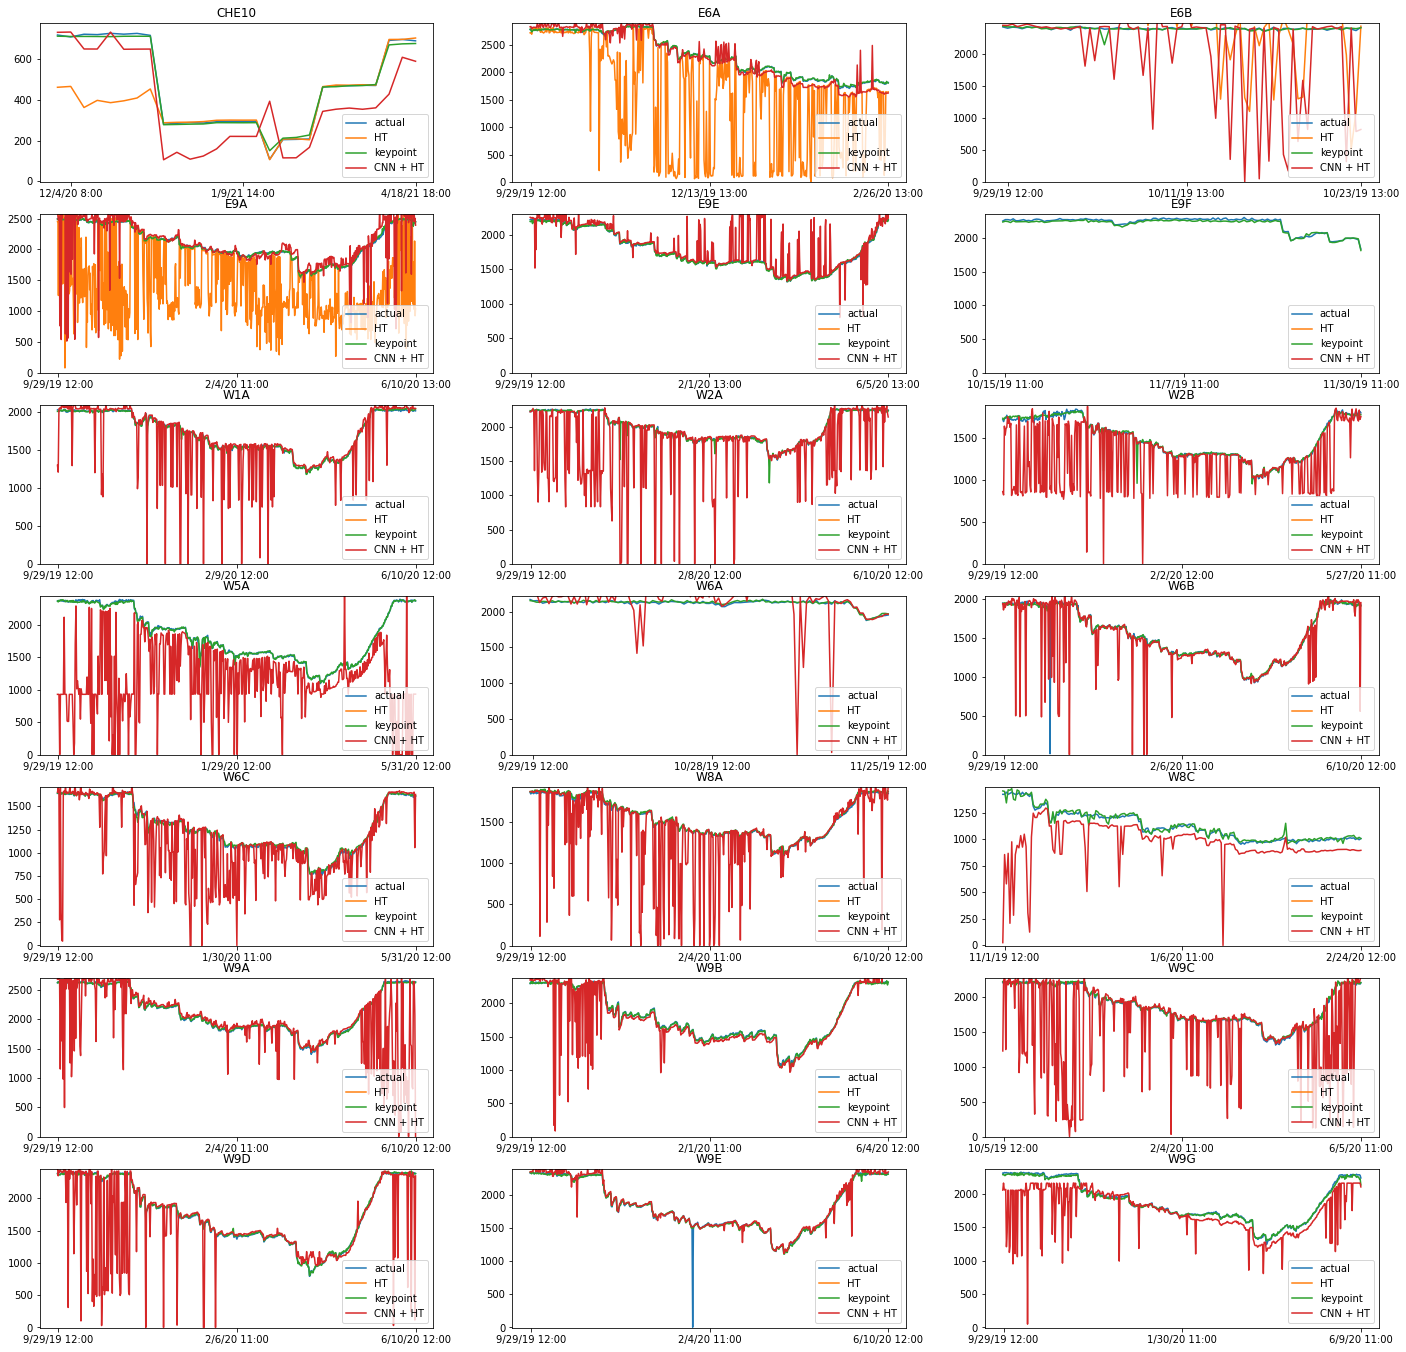

In [94]:
#First just subset by camera, camera CHE10 in this case: 

#mismatch['index'][0]
fig, axs = plt.subplots(7, 3, figsize=(24, 24))
rows = 7
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        axs[row, col].plot(dataList[idx]['date'], dataList[idx]['length_px'])
        axs[row, col].plot(dataList[idx]['date'], dataList[idx]['HT_px'])
        axs[row, col].plot(dataList[idx]['date'], dataList[idx]['keypoint_px'])
        axs[row, col].plot(dataList[idx]['date'], dataList[idx]['CNNht_px'])
        axs[row, col].set_ylim(-5, max(dataList[idx]['length_px'])+50)#300) ## max of the values or just 
        axs[row, col].set_xticks([1,round(len(dataList[idx])/2), len(dataList[idx])-1]) 
        axs[row,col].title.set_text(str(dataList[idx]['camera'].iloc[0])) ## camera ID, but just need the first row
        axs[row,col].legend(["actual", "HT", "keypoint", "CNN + HT"], loc ="lower right")
        idx += 1


In [56]:
str(dataList[idx]['camera'].iloc[0])

'CHE10'

In [95]:
from numpy import load

data = load('/Users/catherinebreen/code/Deep-Hough-Transform-Line-Priors/ht-lcnn/data/wireframe/train/00030043_2_label.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

jmap
[[[0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]]
joff
[[[[ 0.          0.          0.         ...  0.          0.
    -0.5       ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.35287356]]

  [[ 0.          0.          0.         ...  0.          0.
     0.38965625]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         

In [98]:
## investigating .npz file formats:

'jmap'

In [99]:
lst

['jmap', 'joff', 'lmap', 'junc', 'Lpos', 'Lneg', 'lpos', 'lneg']

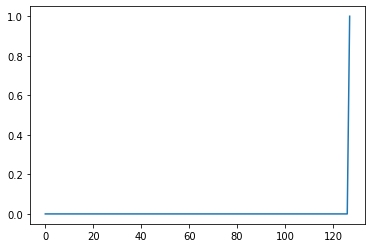

In [106]:
plt.plot(data['jmap'][0,:])